**Predicting House Prices Using Regression**

**(1) Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_csv('house_price_data.csv')
df.head()

,House Size (sqft),Number of Rooms,Distance to City (km),Crime Rate,School Quality,Average Income,Property Tax Rate,Nearby Amenities,Age of Property,House Price
0,3674,4,39.29,2.3,2.5,50933,1.27,23,30,1.169886e+06
1,1360,2,20.13,0.4,7.6,25774,2.56,9,25,3.939464e+05
2,1794,6,31.29,0.2,8.8,92055,2.89,27,28,5.064691e+05
3,1630,7,43.19,9.9,3.0,30983,2.55,7,65,4.924833e+05
4,1595,6,47.50,4.3,1.9,116468,0.50,1,45,4.127284e+05


**(2) Data Visualisation**

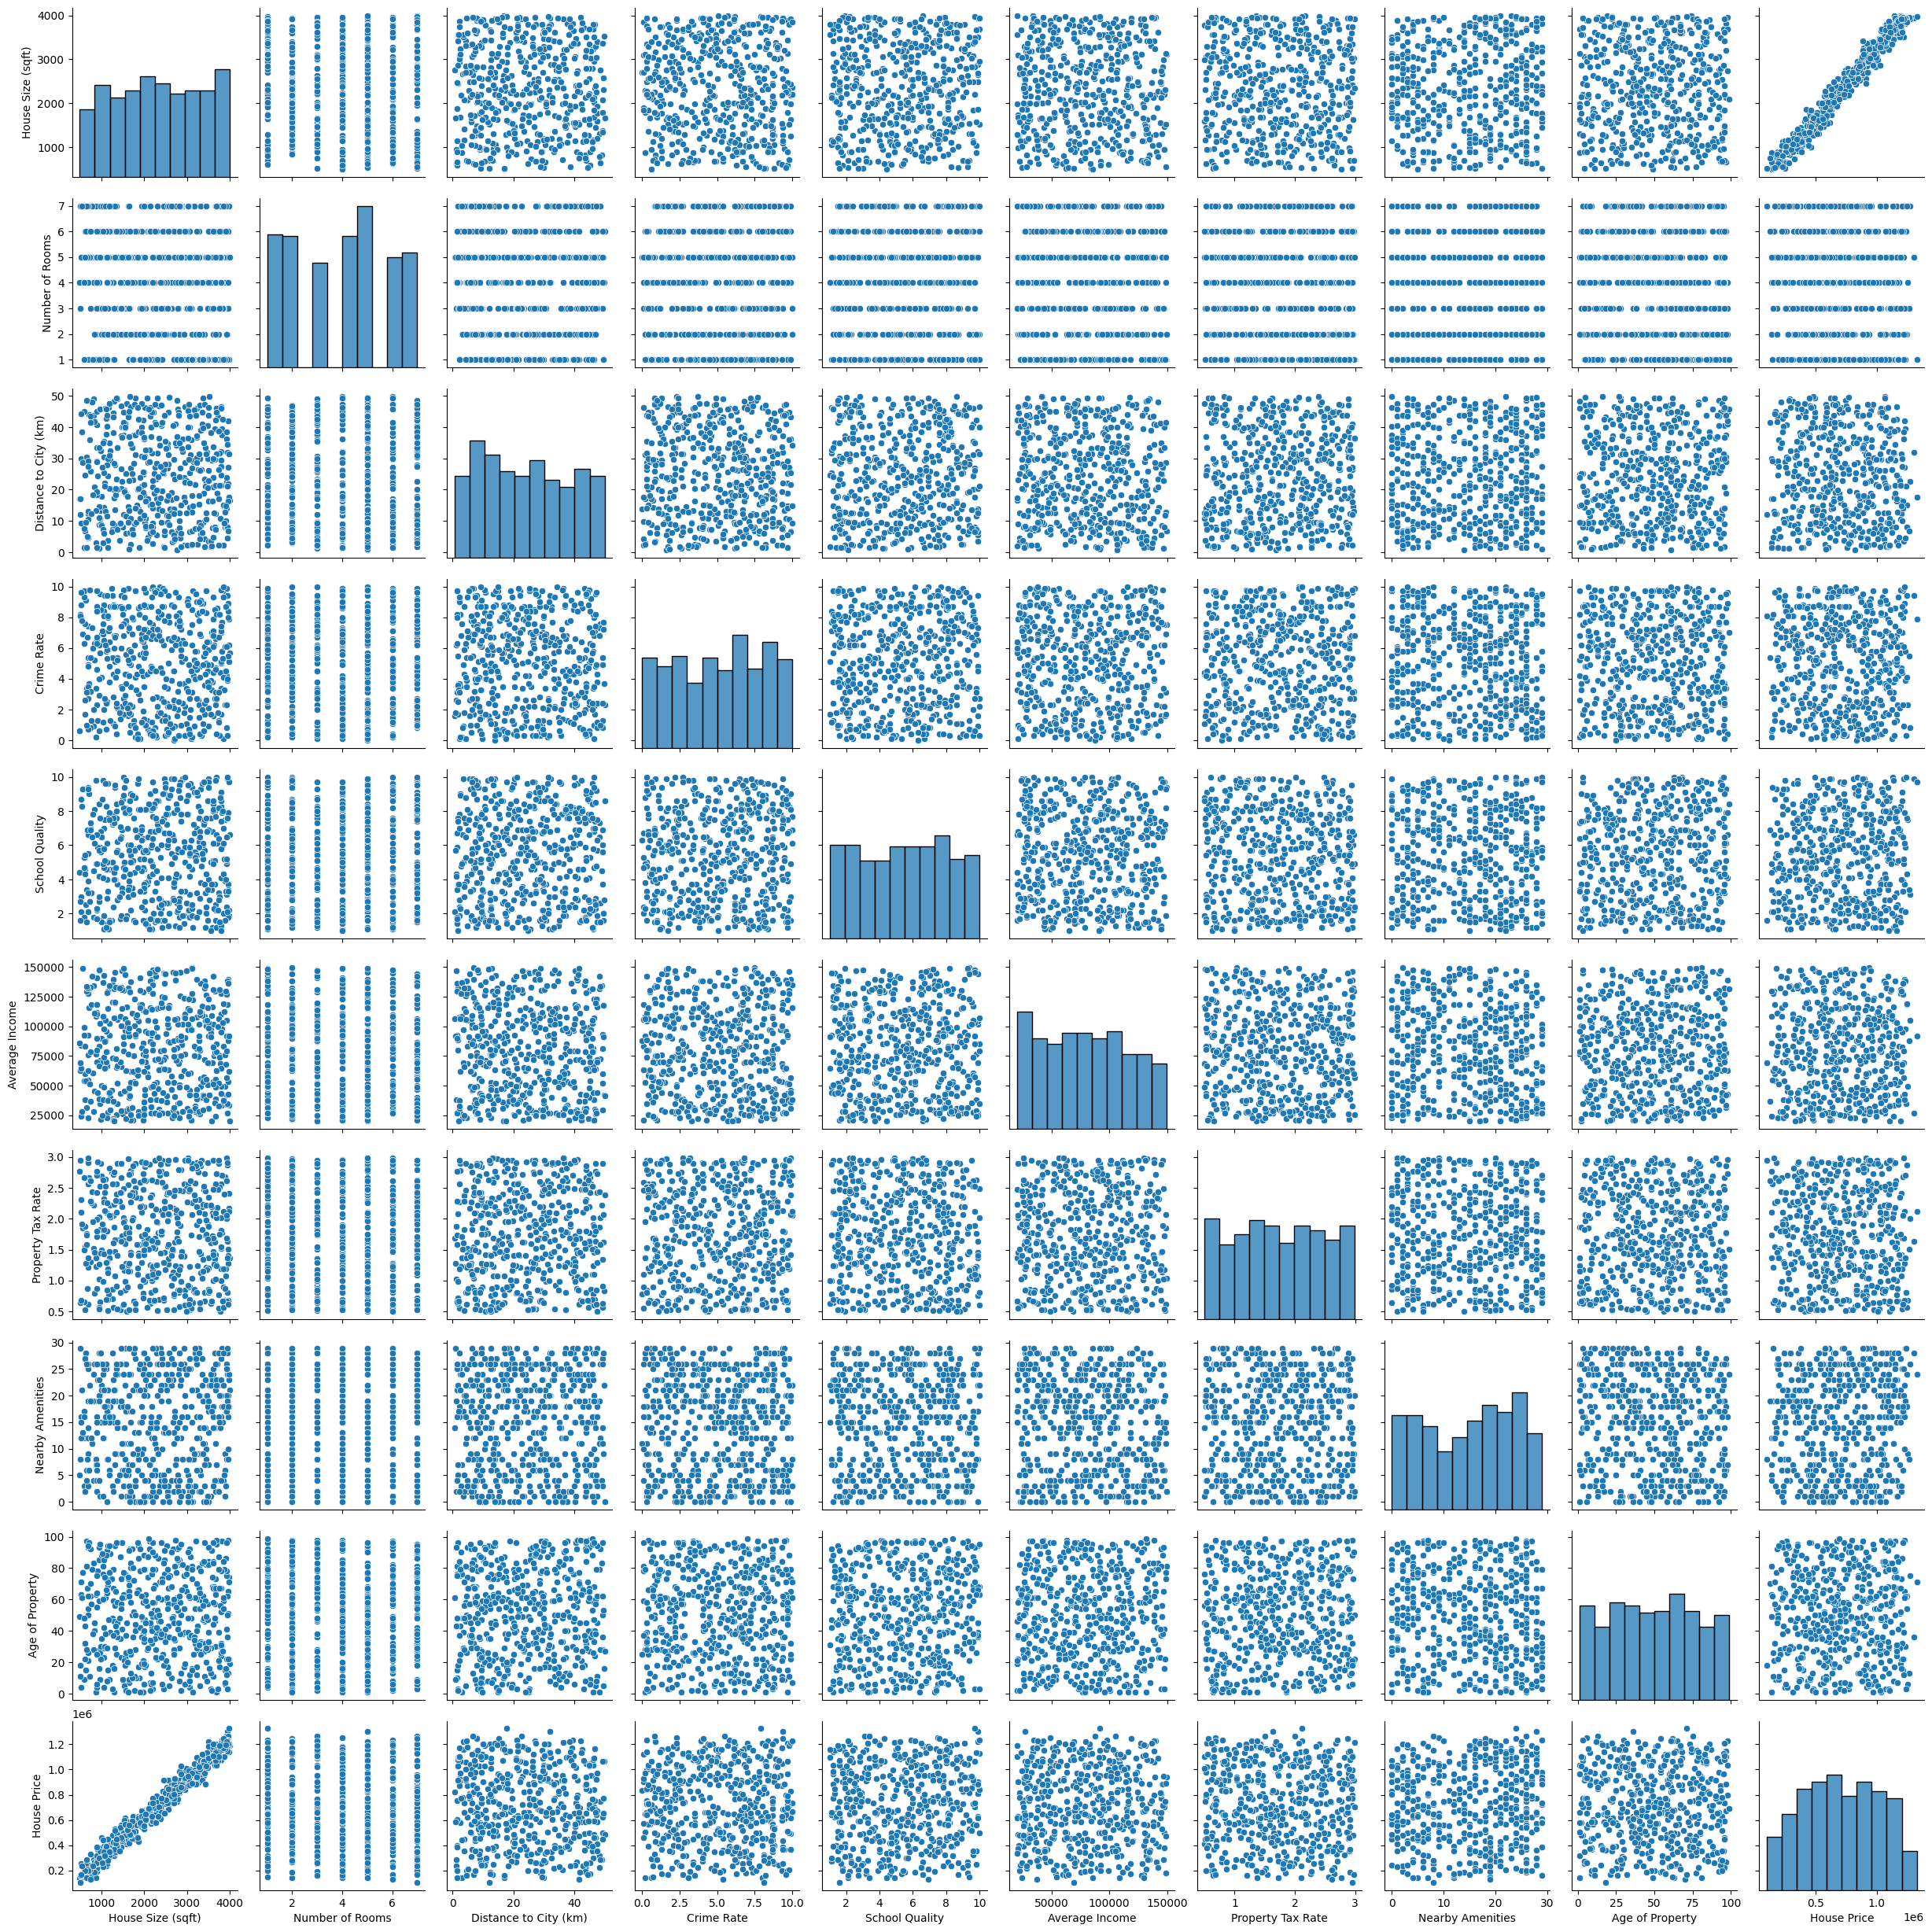

In [ ]:
# prompt: Using dataframe df: House Size (sqft)	vs Number of Rooms	vs Distance to City (km)	vs Crime Rate	School Quality	vs Average Income	vs Property Tax Rate	vs Nearby Amenities	vs Age of Property	vs House Price

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()


**(3) Checking Correlations**

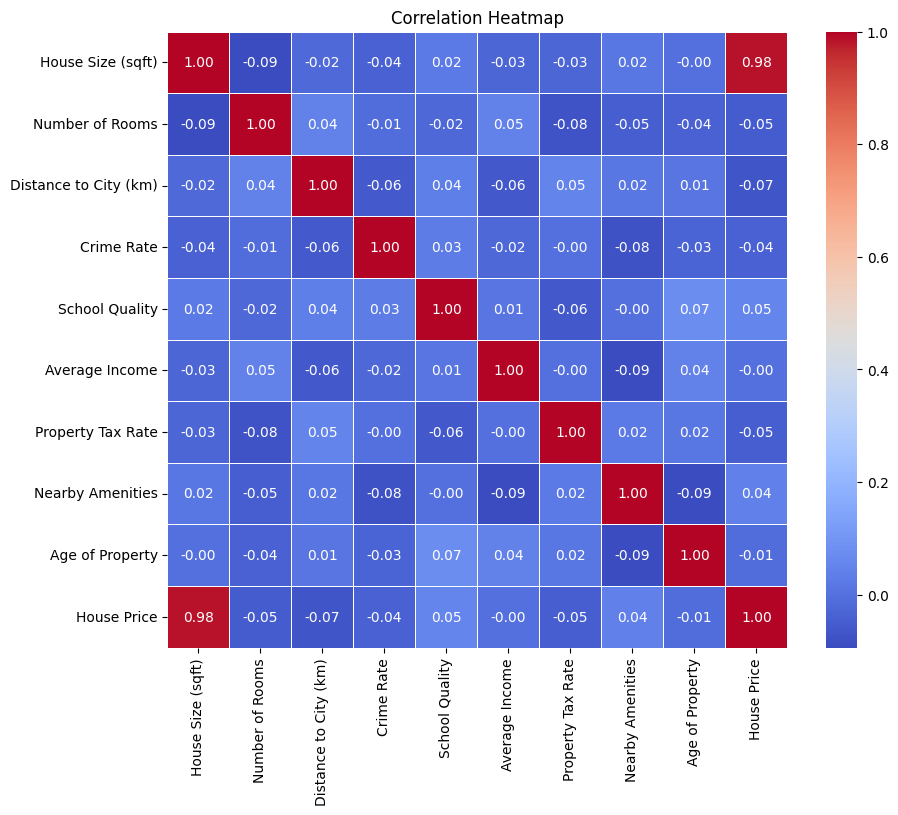

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("house_price_data.csv")

# Compute correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**(4) Checking Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Example: Load your dataset
df = pd.read_csv("house_price_data.csv")

# Define the independent variables (exclude the target variable)
features = df[["House Size (sqft)", "Number of Rooms", "Distance to City (km)",
               "Crime Rate", "School Quality", "Average Income",
               "Property Tax Rate", "Nearby Amenities", "Age of Property"]]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

print(vif_data)


                 Feature       VIF
0      House Size (sqft)  5.305080
1        Number of Rooms  4.370237
2  Distance to City (km)  3.722344
3             Crime Rate  3.623170
4         School Quality  4.944417
5         Average Income  5.038676
6      Property Tax Rate  5.671213
7       Nearby Amenities  3.476580
8        Age of Property  3.908680


In [ ]:
correlation_matrix = features[["House Size (sqft)", "Average Income", "Property Tax Rate"]].corr()
print(correlation_matrix)


                   House Size (sqft)  Average Income  Property Tax Rate
House Size (sqft)           1.000000       -0.025984          -0.026338
Average Income             -0.025984        1.000000          -0.002791
Property Tax Rate          -0.026338       -0.002791           1.000000


**(5) Training and Testing Data**

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df[["House Size (sqft)", "Number of Rooms", "Distance to City (km)",
               "Crime Rate", "School Quality", "Average Income",
               "Property Tax Rate", "Nearby Amenities", "Age of Property"]], df['House Price'])

# Printing the coefficients
#print(reg.coef_)
print("Coefficients:", reg.coef_)

Coefficients: [ 3.03895911e+02  5.84848341e+03 -1.09439491e+03 -1.52711245e+02
  3.70328764e+03  1.61710601e-01 -7.32057345e+03  1.03985457e+03
 -6.87660428e+01]


In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df[["House Size (sqft)", "Number of Rooms", "Distance to City (km)",
        "Crime Rate", "School Quality", "Average Income",
        "Property Tax Rate", "Nearby Amenities", "Age of Property"]]
y = df['House Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)


**(6) Prediction**

In [ ]:
new_data = [[2000, 4, 5, 2, 8, 80000, 1.5, 10, 15]]
predicted_price = reg.predict(new_data)
print(f"Predicted House Price: {predicted_price[0]}")


Predicted House Price: 645190.6252374662


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**(7) Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predicted values
y_pred = reg.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R² Score: 0.9730090862643717
Mean Absolute Error (MAE): 40169.092908467464
Mean Squared Error (MSE): 2317970141.9161363
Root Mean Squared Error (RMSE): 48145.30238679716


**(8) Accuracy Of Model**

In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Model Accuracy: {accuracy:.2f}%")

Mean Absolute Percentage Error (MAPE): 7.26%
Model Accuracy: 92.74%


**(9) HyperParameter Tuning**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Replace this section with your actual dataset
# Example: X, y = your_data_loading_function()
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define algorithms and their hyperparameter grids
models = {
    "LinearRegression": (LinearRegression(), {}),
    "Ridge": (Ridge(), {"alpha": [0.1, 1.0, 10.0]}),
    "Lasso": (Lasso(), {"alpha": [0.01, 0.1, 1.0]}),
    "RandomForest": (RandomForestRegressor(), {
        "n_estimators": [50, 100],
        "max_depth": [None, 10, 20]
    }),
    "XGBoost": (XGBRegressor(), {
        "n_estimators": [50, 100],
        "max_depth": [3, 5],
        "learning_rate": [0.1, 0.01]
    }),
    "SVR": (SVR(), {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    }),
    "GradientBoosting": (GradientBoostingRegressor(), {
        "n_estimators": [50, 100],
        "max_depth": [3, 5],
        "learning_rate": [0.1, 0.01]
    }),
    "KNN": (KNeighborsRegressor(), {
        "n_neighbors": [3, 5, 10],
        "weights": ["uniform", "distance"]
    }),
}

# To store results
results = []

# Loop through models and perform GridSearchCV
for name, (model, param_grid) in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    train_mse = -grid_search.best_score_
    y_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Best Parameters": best_params,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "R^2": r2
    })

# Display results in a DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test MSE")
print(results_df)

# Identify the best model
best_model_entry = results_df.iloc[0]
print(f"Best Model: {best_model_entry['Model']} with Test MSE: {best_model_entry['Test MSE']}, R^2: {best_model_entry['R^2']}, and Parameters: {best_model_entry['Best Parameters']}")

# Fit the best model on the full dataset and save it
best_model_name = best_model_entry['Model']
best_model_instance = models[best_model_name][0]
best_params = best_model_entry['Best Parameters']

# Update the best model with the best parameters
best_model_instance.set_params(**best_params)
best_model_instance.fit(X_train, y_train)

# Make predictions with the best model
final_predictions = best_model_instance.predict(X_test)

# Calculate MAPE and accuracy in percentage
mape = np.mean(np.abs((y_test - final_predictions) / y_test)) * 100
accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Model Accuracy of the best model ({best_model_name}) in percentage: {accuracy:.2f}%")

# Print final predictions
print(f"Final predictions using the best model ({best_model_name}):", final_predictions)

Training LinearRegression...
Training Ridge...
Training Lasso...
Training RandomForest...
Training XGBoost...
Training SVR...
Training GradientBoosting...
Training KNN...
              Model                                    Best Parameters  \
0  LinearRegression                                                 {}   
5               SVR                      {'C': 10, 'kernel': 'linear'}   
1             Ridge                                     {'alpha': 0.1}   
2             Lasso                                    {'alpha': 0.01}   
6  GradientBoosting  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
4           XGBoost  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
3      RandomForest           {'max_depth': None, 'n_estimators': 100}   
7               KNN         {'n_neighbors': 10, 'weights': 'distance'}   

      Train MSE      Test MSE       R^2  
0      0.010480      0.011428  1.000000  
5      0.010541      0.011452  1.000000  
1      0.012019      0.011934  1.000